In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')
print(df.head(2))

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  


In [2]:
df.drop(['Name','Siblings/Spouses Aboard','Parents/Children Aboard','Fare'], inplace=True, axis=1)
print(df.head(2))

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0


In [3]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
print(df.head(2))

   Survived  Pclass  Sex   Age
0         0       3    0  22.0
1         1       1    1  38.0


In [4]:
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [5]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [6]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_train,Y_train)

BernoulliNB()

In [7]:
y_pred=model.predict(X_test)
print(y_pred[:5])

[1 0 0 0 1]


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
acc=accuracy_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
print("Accuracy is: ",acc,"F1 score is: ",f1)

Accuracy is:  0.7715355805243446 F1 score is:  0.6995073891625616


In [9]:
import numpy as np
newdata=np.array([3,1,25]).reshape(1,-1)
newpred=model.predict(newdata)
print(newpred)

[1]


/Users/anaghakalyani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [10]:
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[135  27]
 [ 34  71]]


Text(0.5, 15.0, 'Predicted')

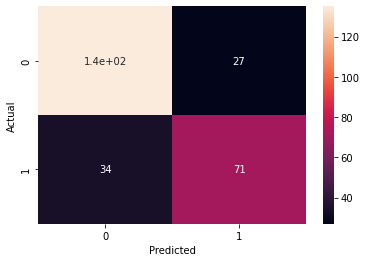

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')